### Contents of the Notebook:
#### Part1: Exploratory Data Analysis(EDA):
 1) Analysis of the features.

 2) Finding any relations or trends considering multiple features.

#### Part2: Feature Engineering and Data Cleaning:
 1) Adding any few features.

 2) Removing redundant features.

 3) Converting features into suitable form for modeling.

#### Part3: Predictive Modeling
 1) Running Basic Algorithms.

 2) Cross Validation.

 3) Ensembling.

 4) Important Features Extraction.

### Part1: Exploratory Data Analysis(EDA)

In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [66]:
data=pd.read_csv('titanic/train.csv')

In [67]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
data.isnull().sum() #checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The `Age, Cabin and Embarked` have null values. I will try to fix them.

##### How manu Survived?

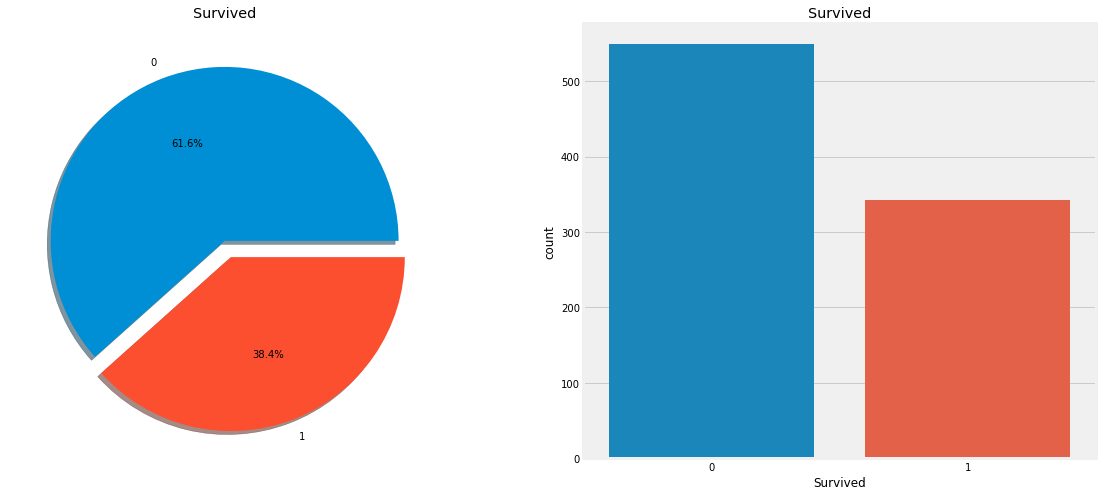

In [69]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only `38.4%` of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age,etc.

First let us understand the different types of features.

### Types Of Features
###### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as `Nominal Variables`.

###### Categorical Features in the dataset: Sex,Embarked.

#### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like `Height` with values `Tall, Medium, Short`, then Height is a ordinal variable. Here we can have a relative sort in the variable.

##### Ordinal Features in the dataset: PClass

#### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

###### Continous Features in the dataset: Age

### Analysing The Features

### Sex -> Categorical Feature

In [70]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

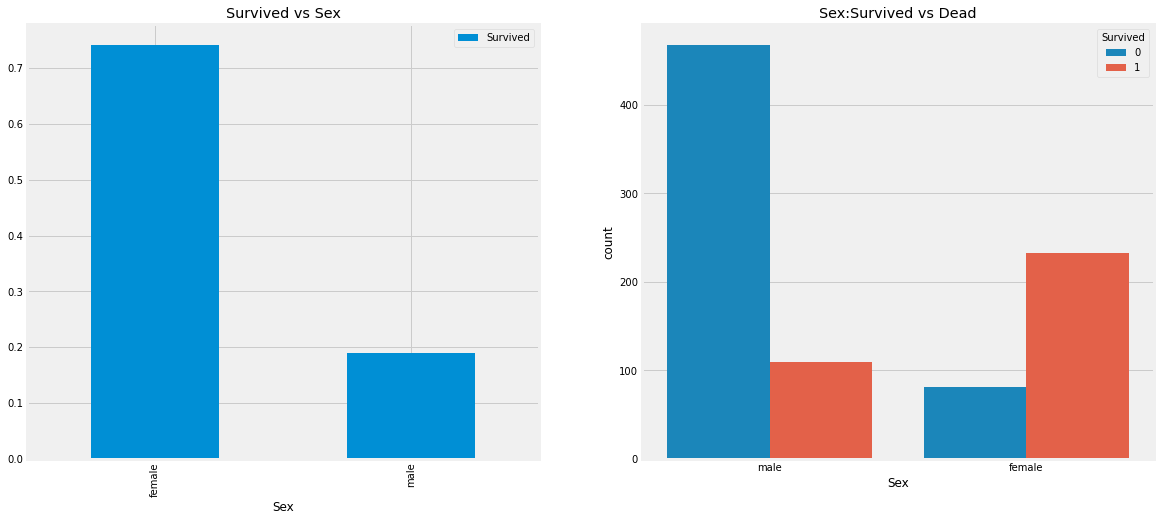

In [71]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a `women on the ship is around 75% while that for men in around 18-19%`.

This looks to be a `very important` feature for modeling. But is it the best?? Lets check other features.

### Pclass --> Ordinal Feature

In [72]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


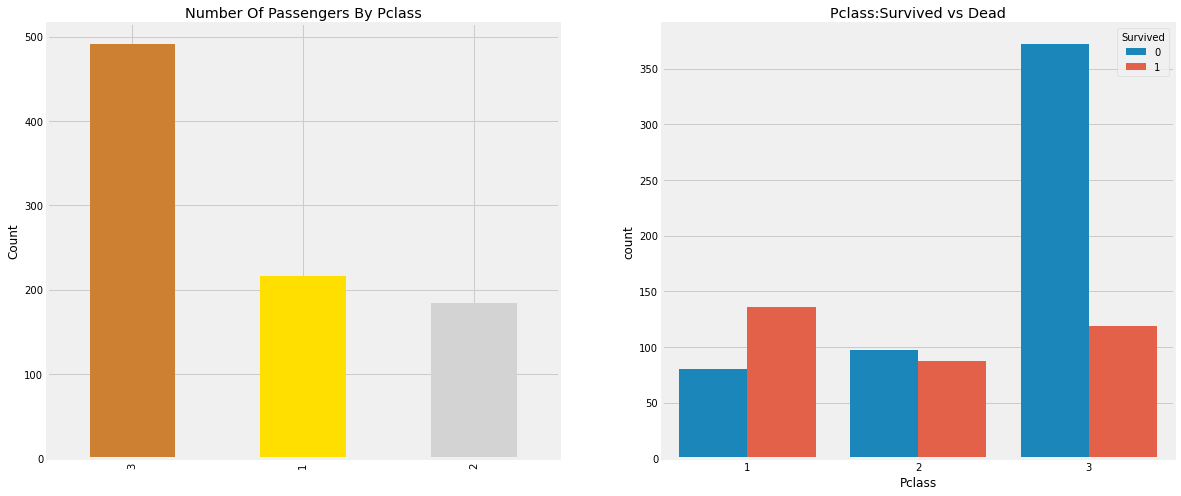

In [73]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

(중략)

In [74]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')  #i를 왜 사용한거지...?
    #data의 name 열에서 정규표현식으로 문자열 추출 -> .으로 마무리

여기에서는 정규표현식 `[A-Za-z]+`를 사용합니다. 이 정규표현식은 `A-Z 또는 a-z` 사이에 있는 문자열을 찾은 다음 `.(점)`으로 끝나는 문자열을 추출합니다. 따라서 우리는 이름에서 이니셜을 성공적으로 추출합니다.

In [75]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex
#.T : 교차표 전치

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme과 같이 Miss를 나타내는 맞춤법이 틀린 이니셜이 있습니다. 이를 Miss로 대체하고, 다른 값들에 대해서도 동일하게 처리하겠습니다.

In [76]:
# 전치하기 전 모양 확인하려고 해봄
pd.crosstab(data.Initial,data.Sex).style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [77]:
# 여성을 나타내는 Mlle, Mme, Ms 값은 모두 Miss로 대체
# 남성을 나타내는 Dr, Major, Col, Capt, Rev, Jonkheer, Sir, Don 값은 모두 Mr로 대체
# 여성의 혼인 상태를 나타내는 Lady, Countess 값은 모두 Mrs로 대체
# 이 외에는 'Other'로 표시
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [78]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

#### Filling NaN Ages

In [79]:
## Assigning the NaN Values with the Ceil values of the mean ages
# 각 이니셜 그룹에서 결측치일 경우, 나이 설정
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [80]:
data.Age.isnull().any() #결측치 여부 확인

False

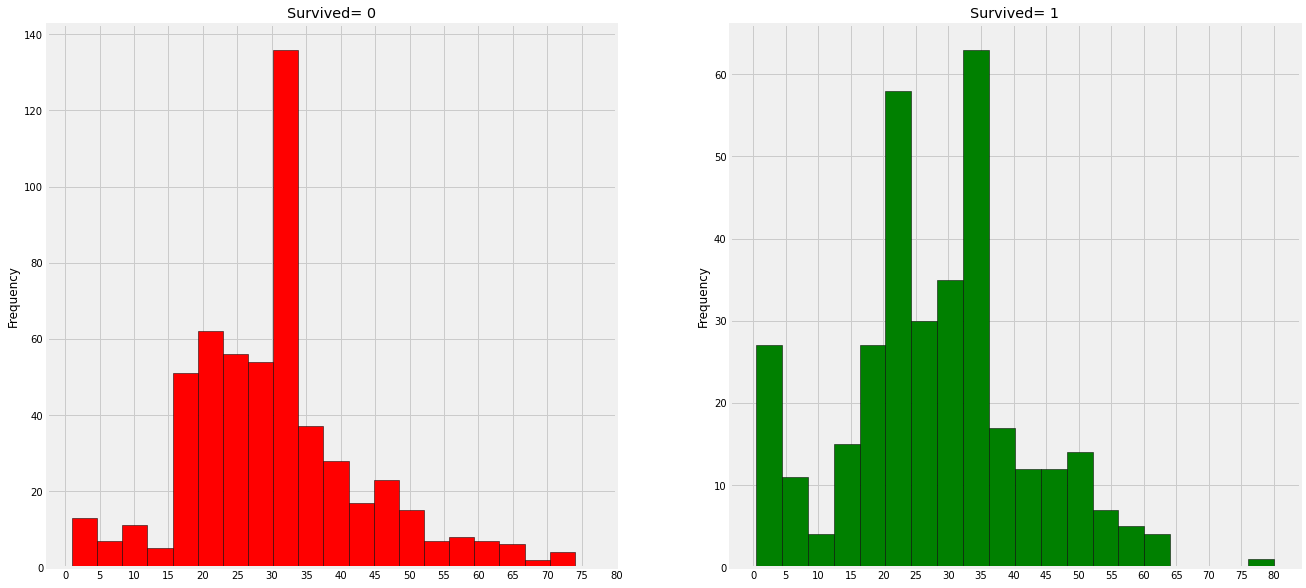

In [81]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1) # set_xticks() 함수를 사용하여 x축의 눈금을 설정
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

### Observations:
1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

2)The oldest Passenger was saved(80 years).

3)Maximum number of deaths were in the age group of 30-40.

(5세 미만의 어린이들과 고령 승객, 여성 승객들이 주로 생존.
30~40대에서 가장 많은 사망자가 발생)

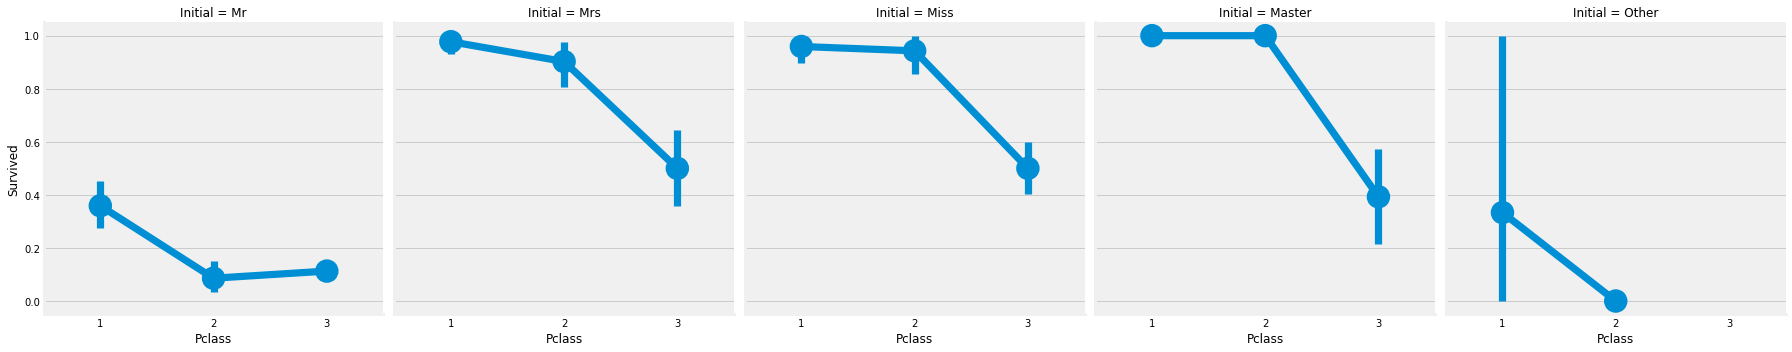

In [82]:
#initail별 Pclass와 Survived간의 관계 시각화
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

### Embarked--> Categorical Value

In [83]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')
# margins=True 인수를 사용하여, 교차표의 합계(All) 열과 행을 추가하여 출력

#### Chances for Survival by Port Of Embarkation

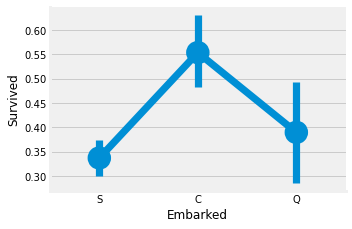

In [84]:
#factorplot - 범주형 변수 시각화할때 사용
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf() #현재 활성화된 그래프 가져오기
fig.set_size_inches(5,3)
plt.show()

C 항구에서 생존할 확률은 약 0.55로 가장 높으며, S 항구에서는 가장 낮습니다.

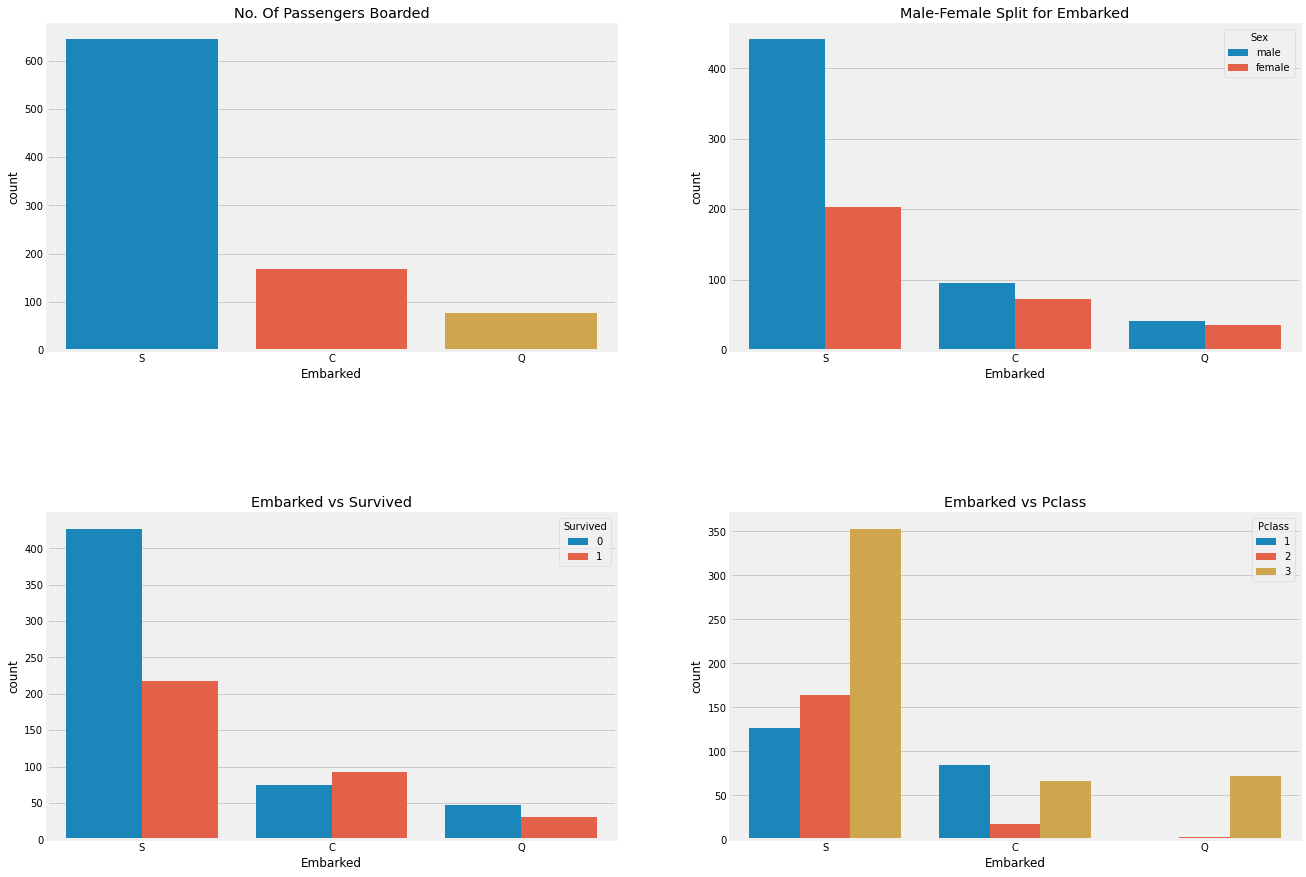

In [85]:
#4개의 서브플롯 생성
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5) #subplot 간격 조정
plt.show()

1) S에서 가장 많은 승객이 탑승했습니다. 이들의 대부분은 Pclass3 출신입니다.

2) C에서 탑승한 승객들은 생존 가능성이 높은 것으로 보입니다. 그 이유는 Pclass1 및 Pclass2 승객들이 모두 구조되었기 때문일 수 있습니다.

3) Embark S는 부자들이 주로 탑승한 항구입니다. 그럼에도 불구하고 생존 가능성이 낮은 이유는 Pclass3 승객의 약 `81%`가 생존하지 못했기 때문입니다.

4) Q항에서는 승객의 거의 95%가 Pclass3 출신이었습니다.

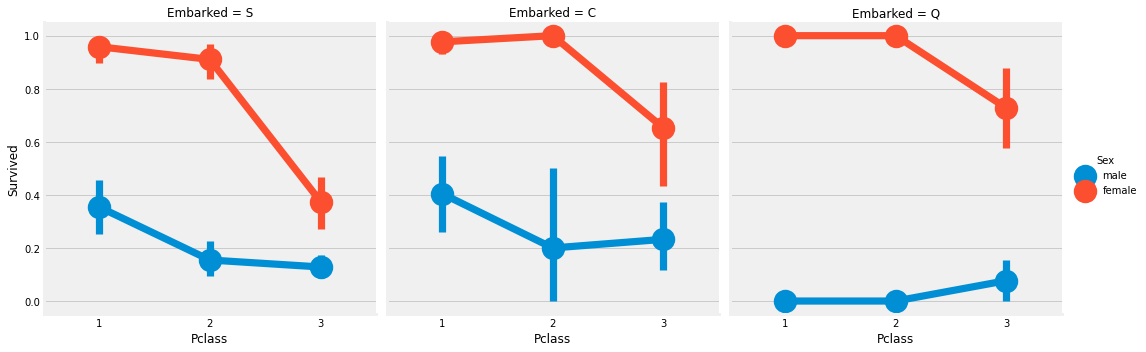

In [86]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

1) 여성의 생존 확률은 Pclass와 관계없이 Pclass1 및 Pclass2에 대해 거의 1입니다.

2) Pclass3 승객의 경우 남녀 모두 생존율이 매우 낮으므로 Port S는 매우 불운합니다.(`돈 문제`)

3) 거의 모든 Pclass3 승객이 포함되어 있으므로 Port Q는 남성들에게 가장 불운합니다.

#### Filling Embarked NaN

대부분의 승객이 S에서 탑승 => 결측값을 S로 변경.

In [87]:
data['Embarked'].fillna('S',inplace=True)

In [88]:
data.Embarked.isnull().any()# Finally No NaN values

False

### SibSip-->Discrete Feature

가족 구성원이 어떻게 되는지.

Sibling = 형제, 자매, 이복형제, 이복자매

Spouse = 남편, 아내

In [89]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


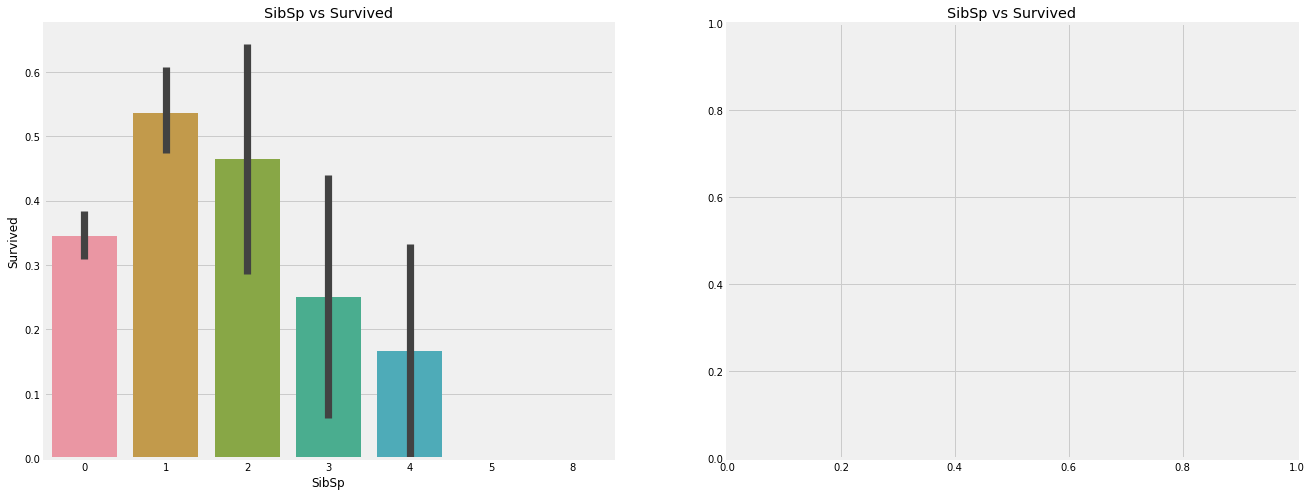

In [90]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [91]:
#Sipsp와 Pclass의 교차표
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


형제자매 없이 혼자 탑승한 승객은 34.5%의 생존율
형제자매가 늘어날수록 생존율이 감소하는 것으로 보임
(...why 만약 내 가족이 함께 탑승했다면, 내 자신보다 먼저 가족을 구할 것)
5-8명 가족들의 생존율은 `0%`입니다. 이것은 Pclass 때문인가요?

그 이유는 `Pclass` 때문입니다. 대가족(>3)들은 모두 Pclass3에 있었기 때문에 모든 대가족들이 사망한 것으로 나타납니다. 

### Parch

In [92]:
#부모나 자녀가 함께 탑승한 인원(Parch)이 각 좌석 등급(Pclass)에 몇 명씩 있는지
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


대가족이 주로 Pclass3에 속하며, 이와 Pclass3의 생존율이 낮은 것과 관련있을것

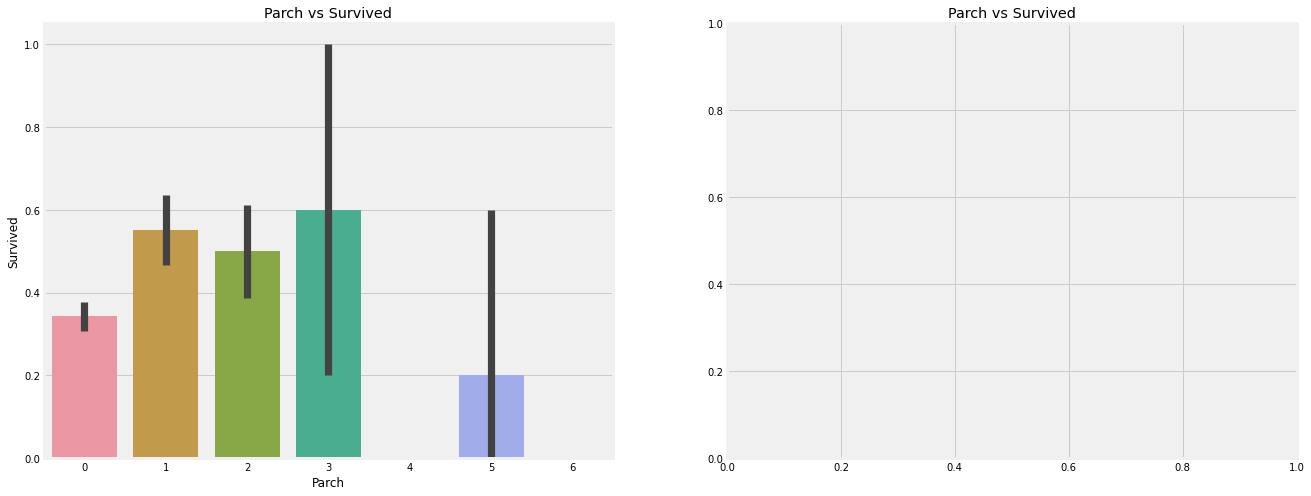

In [93]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

여기에서도 결과는 거의 비슷합니다. 부모가 함께 있는 승객들은 생존 기회가 더 높습니다. 하지만 부모의 수가 증가함에 따라 생존 기회가 줄어듭니다.

1~3명의 부모를 동반한 승객은 생존 기회가 좋습니다. 혼자인 경우 생존 가능성이 줄어들며, 4명 이상의 부모를 동반한 경우 생존 기회가 떨어집니다.

### Fare--> Continous Feature

* fare - 운임료

In [94]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


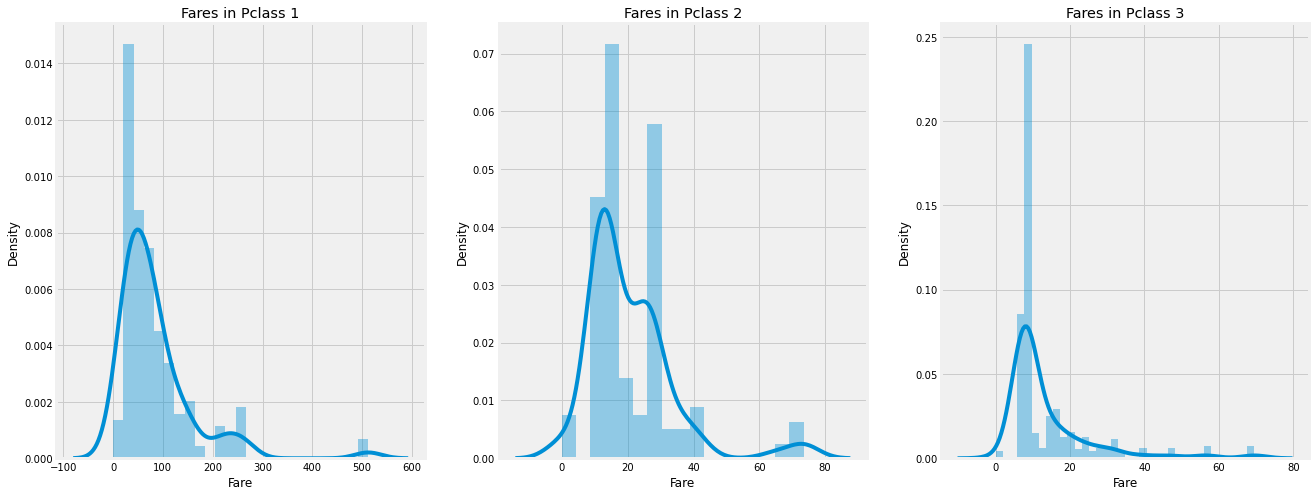

In [95]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1 승객의 요금 분포가 크게 보이며, 이 분포는 등급이 낮아질수록 감소합니다. 이 값은 연속적이므로 binning을 사용하여 이산적인 값으로 변환할 수 있습니다.

#### 모든 feature에 대한 요약:
`성별`: 여성의 생존 확률이 남성에 비해 높습니다.

`Pclass`: 1등급 승객이 생존 확률이 높은 경향이 있습니다. Pclass3의 생존율은 매우 낮습니다. 여성의 경우, Pclass1에서의 생존 확률은 거의 1이며 Pclass2에서도 높습니다. 돈이 이긴다!!!

`나이`: 5-10살 이하의 어린이는 생존 확률이 높습니다. 15~35세 승객들의 사망률이 높았습니다.

`Embarked`: 매우 흥미로운 feature입니다. C에서의 생존 확률이 S에서 대다수의 Pclass1 승객이 내렸을 때보다 더 높아보입니다. Q의 승객은 모두 Pclass3이었습니다.

`Parch+SibSp`: 1-2명의 형제자매 또는 배우자가 있는 경우 또는 부모가 1-3명 있는 경우 혼자 있거나 대가족과 함께 여행하는 것보다 더 큰 생존 가능성이 있습니다.

### Correlation Between The Features

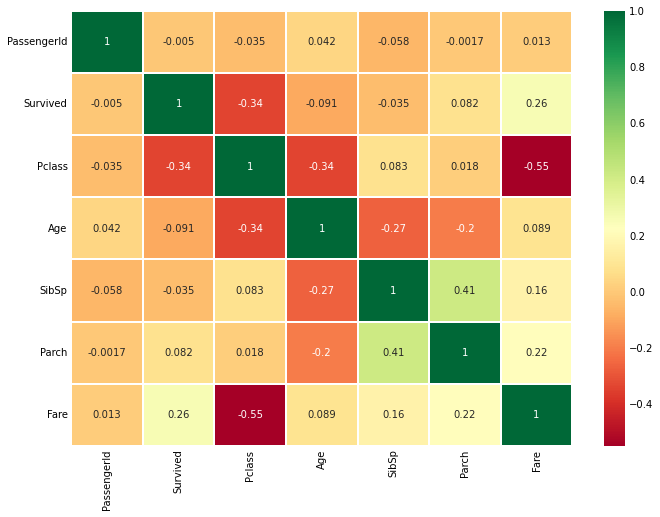

In [96]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

###### 히트맵 해석하기
가장 먼저 주목해야 할 점은 알파벳이나 문자열로 상관관계를 파악할 수 없기 때문에 수치적인 특징들만 비교된다는 것입니다. 그림을 이해하기 전에, 상관관계란 무엇인지 알아보겠습니다.

* 양의 상관관계: 특징 A의 증가가 특징 B의 증가로 이어진다면, 그들은 양의 상관관계를 가집니다. 값이 1이면 완벽한 양의 상관관계를 가집니다.

* 음의 상관관계: 특징 A의 증가가 특징 B의 감소로 이어진다면, 그들은 음의 상관관계를 가집니다. 값이 -1이면 완벽한 음의 상관관계를 가집니다.

이제 두 특징이 높거나 완전히 상관관계가 있는 경우, 하나의 증가가 다른 증가를 이끌어내므로 두 특징은 매우 유사한 정보를 포함하며 정보의 분산이 거의 없습니다. 이를 `다중공선성`이라고하며 두 특징 모두 거의 동일한 정보를 포함하고 있으므로 하나는 중복되는 기능입니다.

그래서 두 특징을 모두 사용해야 할까요? `하나가 중복`되기 때문에 모델을 만들거나 훈련할 때 중복된 기능을 제거하려고 노력해야 합니다. 이는 훈련 시간을 줄이고 많은 이점을 가져옵니다.

이제 위의 히트맵에서 특징들이 서로 매우 관련이 없다는 것을 알 수 있습니다. 가장 높은 상관관계는 `SibSp와 Parch 사이에 있으며 0.41`입니다. 따라서 모든 특징을 사용할 수 있습니다.

### Part2: Feature Engineering and Data Cleaning

Feature Engineering(특성 공학)이란 무엇일까요?

특성이 포함된 데이터셋을 받았을 때, 모든 특성이 중요하다는 보장은 없습니다. 불필요한 중복 특성이 있을 수 있습니다. 또한 다른 특성에서 정보를 추출하거나 관찰하여 새로운 특성을 얻을 수 있습니다.

예를 들어, 이름 특성을 사용하여 이니셜 특성을 얻는 것입니다. 새로운 특성을 얻고 몇 개의 특성을 제거할 수 있는지 확인해보겠습니다. 또한 예측 모델링에 적합한 기존 특성을 적절한 형식으로 변환할 것입니다.

### Age_band

* age변수의 연속성을 범주로

In [97]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [98]:
#빈도수 계산 후 시각화
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


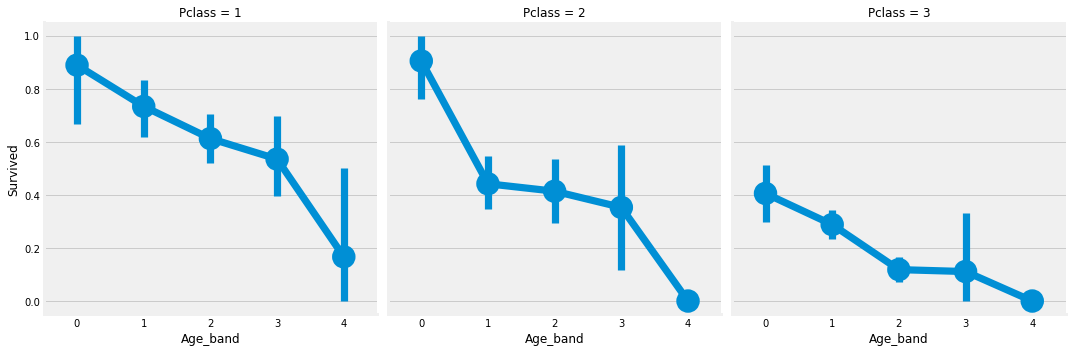

In [99]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

나이가 증가하면 Pclass와 관계없이 생존율이 낮아지는 경향이 있다.

### 가족 규모, Alone
"Family_size"와 "Alone"이라는 새로운 특성을 만들고 분석할 수 있습니다. 이 특성은 Parch와 SibSp의 합입니다. 이를 통해 승객의 가족 규모와 생존율 사이에 관계가 있는지 확인할 수 있습니다. Alone 특성은 승객이 혼자인지 여부를 나타냅니다.

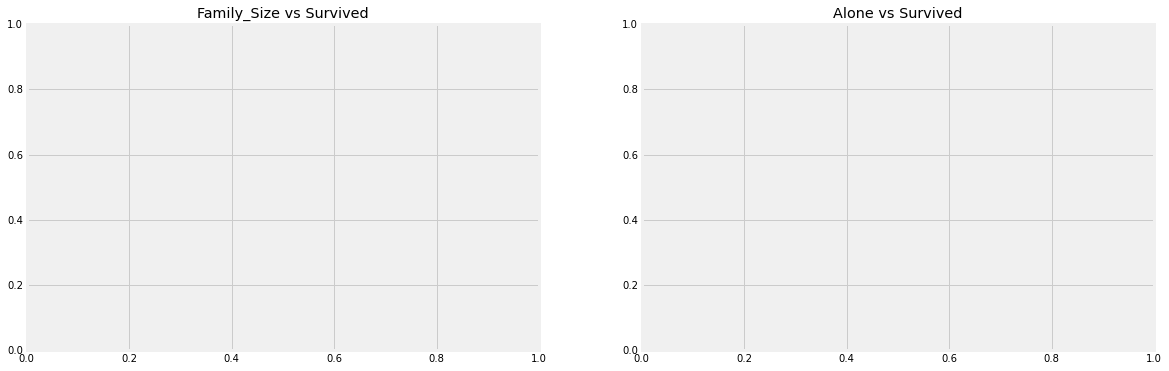

In [100]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

`Family_Size=0은 승객이 혼자인 것`을 의미합니다. 분명히, 혼자인 경우 또는 가족 규모가 0인 경우 생존 확률은 매우 낮습니다. 가족 규모가 4보다 큰 경우에도 생존 확률이 감소합니다. 이것은 모델에 중요한 feature로 보입니다. 이를 더 자세히 살펴보겠습니다.

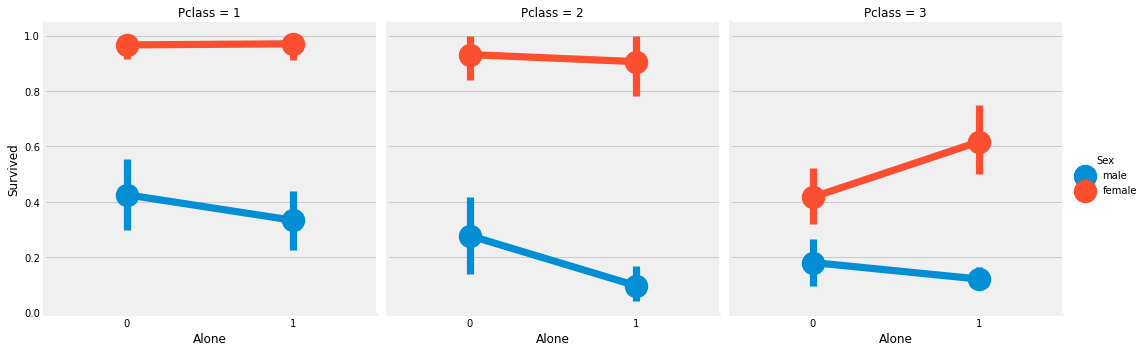

In [101]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

### Fare_Range

In [102]:
data['Fare_Range']=pd.qcut(data['Fare'],4) # qcut: 타이타닉 운임변수 4구간으로 나누기
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [103]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

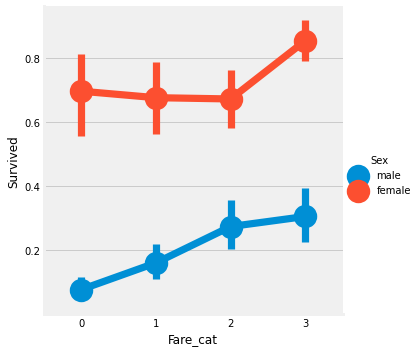

In [104]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

### Converting String Values into Numeric
머신 러닝 모델에 문자열을 전달할 수 없기 때문에, 성별, 탑승항구 등과 같은 특징들을 숫자 값으로 변환해야 합니다.





In [105]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

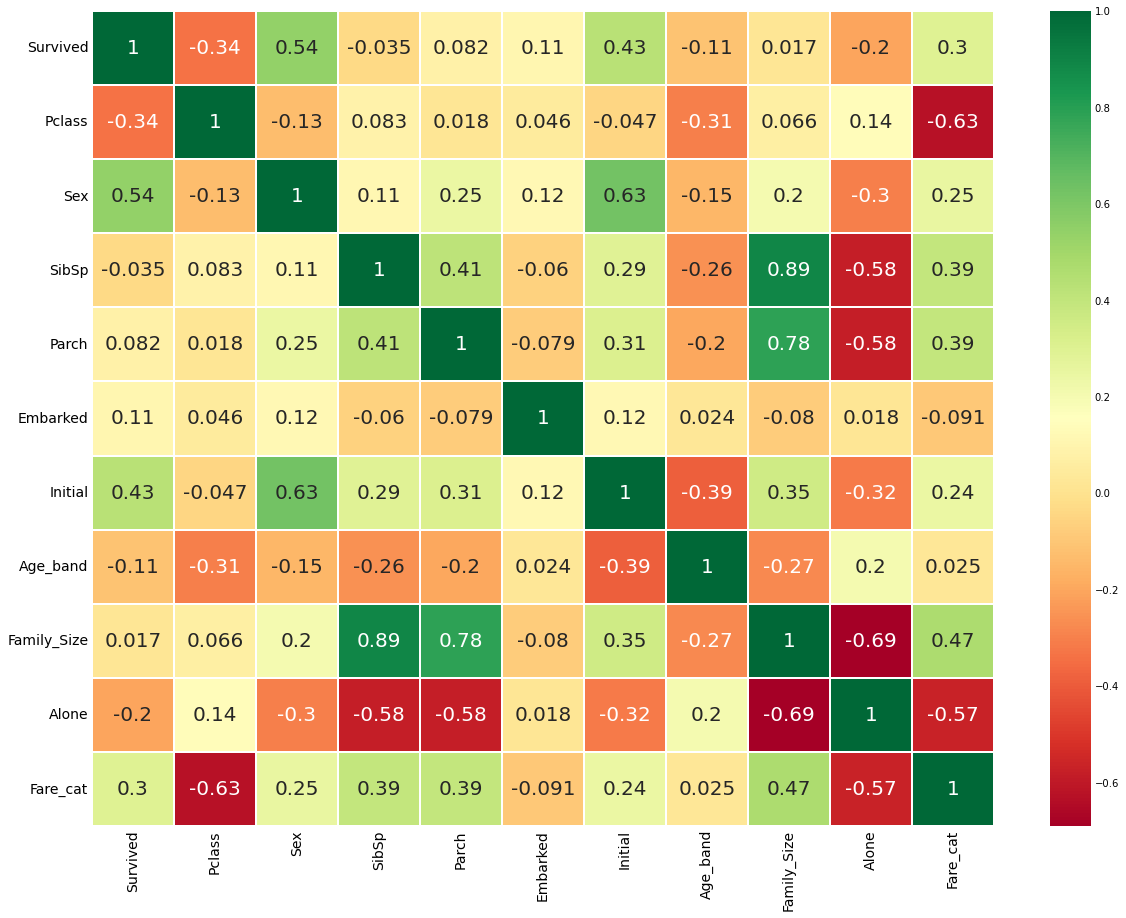

In [106]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True) #불필요한 열 제거
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20}) #annot=True - 각 셀에 상관계수를 표시
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# cmap='RdYlGn': heatmap에 사용할 색상 맵을 지정합니다. 'RdYlGn'은 적색(Red)-노란색(Yellow)-녹색(Green)을 사용하는 색상 맵입니다.
# linewidths=0.2: heatmap에서 각 셀을 구분하는 선의 두께를 설정합니다. 이 경우, 0.2로 설정되어 있습니다.
# annot_kws={'size':20}: heatmap의 각 셀에 표시될 annotation(값)의 크기를 설정합니다. 이 경우, 크기를 20으로 설정했습니다.

### Part3: Predictive Modeling
이제 일부 우수한 분류 알고리즘을 사용하여 승객이 생존할지 여부를 예측할 것입니다. 다음은 모델을 만드는 데 사용할 알고리즘입니다.

1) 로지스틱 회귀

2) 서포트 벡터 머신 (선형 및 방사형)

3) 랜덤 포레스트

4) K-최근접 이웃

5) 나이브 베이즈

6) 의사 결정 나무

7) 로지스틱 회귀

In [107]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [108]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived']) 
#stratify=data['Survived']는 클래스 레이블인 생존 여부를 기준으로 층화 추출
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

#### Radial Support Vector Machines(rbf-SVM)

In [109]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


#### Linear Support Vector Machine(linear-SVM)

In [110]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


#### Logistic Regression

In [111]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


#### Decision Tree

In [112]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


#### K-Nearest Neighbours(KNN)

In [113]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


이제 KNN 모델의 정확도는 n_neighbours 속성 값에 따라 변화합니다. 기본값은 5입니다. n_neighbours의 다양한 값에 대한 정확도를 확인해 보겠습니다.

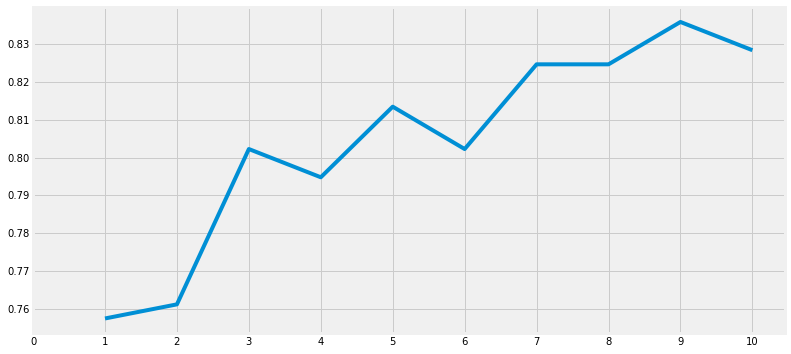

Accuracies for different values of n are: [0.75746269 0.76119403 0.80223881 0.79477612 0.81343284 0.80223881
 0.82462687 0.82462687 0.8358209  0.82835821] with the max value as  0.835820895522388


In [116]:
#데이터를 무작위로 분할 & 시드 설정 x => 실행할때마다 결과 달라짐
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

#### Gaussian Naive Bayes

In [117]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


#### Random Forests

In [118]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8134328358208955


### Cross Validation(교차검증)
자주 일어나는 상황 중 하나는 데이터가 불균형 할 수 있다는 것입니다. 예를 들어, 클래스1의 인스턴스가 많지만 다른 클래스 인스턴스의 수는 적을 수 있습니다. 따라서 데이터 세트의 모든 인스턴스에서 알고리즘을 학습 및 테스트해야합니다. 그런 다음 데이터 세트의 모든 인스턴스에 대한 평균 정확도를 측정할 수 있습니다.

1) K-Fold Cross Validation은 데이터 세트를 k-서브셋으로 나누어 시작합니다.

2) 예를 들어 데이터 세트를 (k = 5) 부분으로 나누면 1 부분은 테스트에 예약하고 알고리즘을 4 부분에서 학습합니다.

3) 테스트 부분을 각 반복에서 변경하고 다른 부분에서 알고리즘을 학습하여 프로세스를 계속합니다. 정확도와 오류는 평균화되어 알고리즘의 평균 정확도를 얻을 수 있습니다.

이를 K-Fold Cross Validation이라고합니다.

4) 알고리즘이 어떤 학습 데이터에서는 과소적합하고 때로는 다른 학습 세트에서는 과적합 할 수 있습니다. 따라서 교차 검증을 통해 일반화 된 모델을 얻을 수 있습니다.

In [120]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813770,0.042219
Decision Tree,0.808115,0.025537
Naive Bayes,0.801386,0.028999
Random Forest,0.814869,0.037341


데이터를 분할할 때 shuffle=False 로 설정되어 있으면 random_state 값을 설정해도 분할할 때마다 동일한 결과를 얻을 수 없기 때문에 의미가 없다는 것을 나타내는 에러입니다. 이 경우, random_state 값을 None으로 설정하거나 shuffle=True로 설정해야합니다.

<AxesSubplot:>

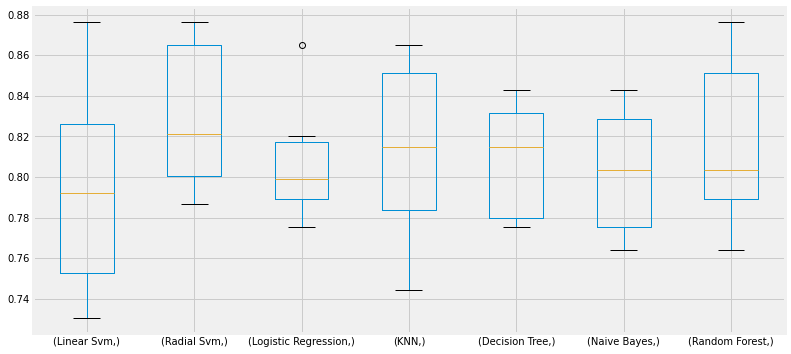

In [121]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

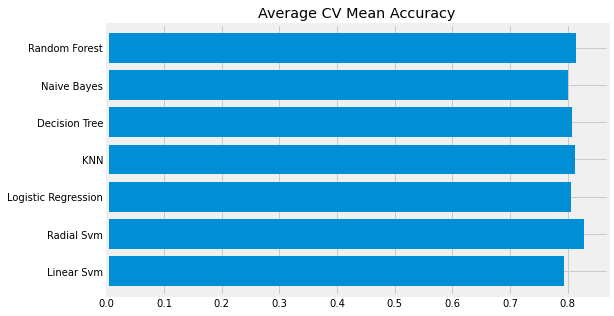

In [122]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix

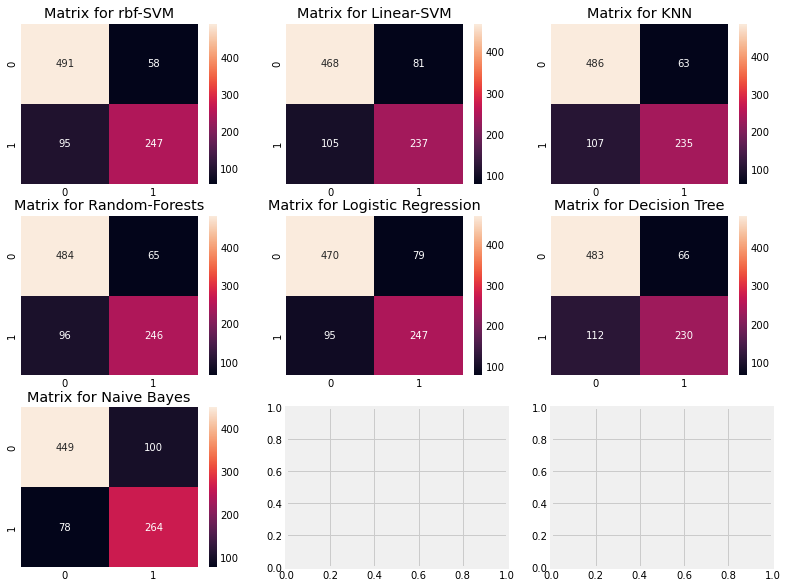

In [123]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

#### SVM

In [124]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [125]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


#### Ensembling
모델의 정확도나 성능을 향상시키는 좋은 방법 중 하나입니다. 간단한 모델을 결합하여 하나의 강력한 모델을 만드는 것입니다.

예를 들어, 우리가 휴대폰을 구입하려고 하고 다양한 매개변수에 대해 많은 사람들에게 물어봤다고 가정해보면, 우리는 모든 다른 매개변수를 분석한 후 하나의 제품에 대해 강력한 판단을 내릴 수 있습니다. 이것이 Ensembling이며, 모델의 안정성을 향상시킵니다. Ensembling은 다음과 같은 방법으로 수행할 수 있습니다.

1) Voting Classifier

2) Bagging

3) Boosting

### Voting Classifier
많은 다른 단순 기계 학습 모델의 예측을 결합하는 가장 간단한 방법 중 하나입니다. 서브 모델 또는 베이스 모델은 모두 다른 유형입니다.

In [126]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8226716604244693


#### Bagging
##### Bagged KNN

In [127]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


##### Bagged DecisionTree

In [128]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


#### Boosting

##### AdaBoost(Adaptive Boostiong)

In [129]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


##### Stochastic Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


##### XGBoost

In [131]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[03:05:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:05:12] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:05:14] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:05:16] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

##### Hyper-Parameter Tuning for AdaBoost

In [132]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: 

##### Confusion Matrix for the Best Model

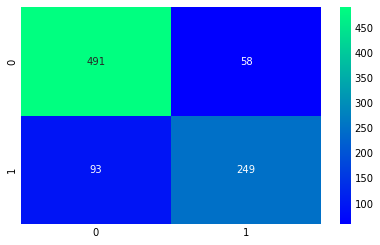

In [133]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

#### Feature Importance

[11:26:32] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


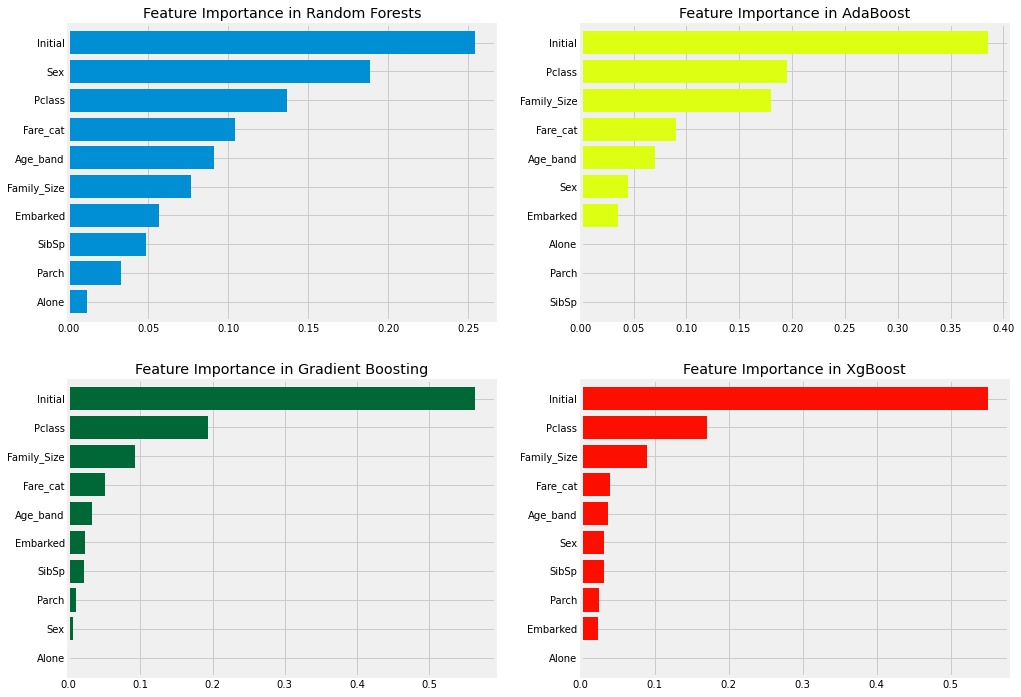

In [134]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()